In [1]:
# Cosmic Web Analysis: Spectroscopic vs Photometric Comparison
# Team:Jenna Shuffelton, Valeria Lopez, Celine Mayer
# Question: Does the spectroscopic sample miss cosmic structures due to selection bias?
# We want: Compare SDSS spectroscopic and photometric galaxy samples to investigate
# whether selection bias causes us to miss large-scale structures (filaments, voids, clusters)

In [2]:
## Our Sky Region (values in the proposal!)

#RA:180 to 185 (5 degree width) -- degrees
#Dec: 30 to 35 (5 degree height) -- degrees
#Redshift 0.02 < z < 0.30

In [3]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install astro-datalab
from dl import queryClient as qc
from astropy.cosmology import Planck18 as cosmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.4/966.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 2.1 MB/s eta 0:00:00


In [5]:
#region parameters
ra_min = 180.0
ra_max = 185.0
dec_min = 30.0
dec_max = 35.0
z_min = 0.02
z_max = 0.30

print(f"RA range:  {ra_min} to {ra_max} degrees (width: {ra_max - ra_min} degrees)")
print(f"Dec range: {dec_min} to {dec_max} degrees (height: {dec_max - dec_min} degrees)")
print(f"Redshift:  {z_min} to {z_max}\n")
print(f"Sky area: {(ra_max - ra_min) * (dec_max - dec_min)} square degrees")

RA range:  180.0 to 185.0 degrees (width: 5.0 degrees)
Dec range: 30.0 to 35.0 degrees (height: 5.0 degrees)
Redshift:  0.02 to 0.3

Sky area: 25.0 square degrees


In [6]:
#Spectroscopic Data Collection
#Jenna, I think you wanted to work on this?
## Query SDSS DR17 specObj table to get galaxies w their accurate spectroscopic redshifts
##git has the examples for this

## i did some research and for this section we need this -- feel free to delete or add if i missed something:

#1. Query SDSS spectroscopic catalog
#2. Filter for galaxies in our sky region
#3. Remove bad redshifts
#4. Save data to CSV
#5. Create basic plots

In [7]:
# Spectroscopic query
query_spec = f"""
SELECT
    s.ra,
    s.dec,
    s.z,
    s.zerr,
    s.class,
    s.specobjid
FROM sdss_dr17.specobj AS s
WHERE
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
print("Spectroscopic query ready.")
print("Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')")

Spectroscopic query ready.
Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')


In [8]:
# like in the git, test query with limit 100
spec_data_test = qc.query(sql=query_spec, fmt='pandas')
print("Galaxies retrieved", len(spec_data_test))
print("First 5 entries")
print(spec_data_test.head())

Galaxies retrieved 2415
First 5 entries
          ra        dec         z      zerr   class            specobjid
0  180.40698  30.003892  0.164183  0.000035  GALAXY  2505266993263831040
1  180.49896  30.004638  0.071869  0.000020  GALAXY  2508591093285677056
2  180.75047  30.007559  0.127590  0.000024  GALAXY  2505277988380108800
3  181.10918  30.004950  0.079258  0.000033  GALAXY  2508579548413585408
4  180.07069  30.035298  0.151829  0.000019  GALAXY  2505264519362668544


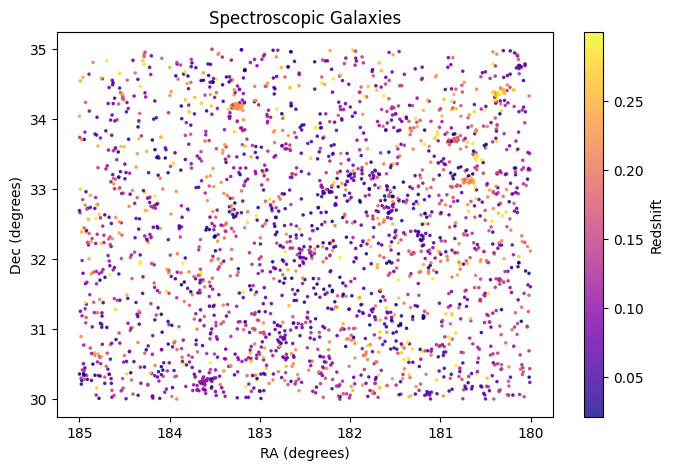

In [9]:
# Simple visualization of test data

plt.figure(figsize=(8, 5))
plt.scatter(spec_data_test['ra'],spec_data_test['dec'],c=spec_data_test['z'], s=2.5, alpha=0.8, cmap='plasma')

plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Spectroscopic Galaxies')
plt.colorbar(label='Redshift')
plt.gca().invert_xaxis()
plt.show()

In [10]:
#Photometric Query
query_photo = f"""
SELECT
    l.ra,
    l.dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic
FROM ls_dr10.tractor AS l
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND l.type != 'PSF'  -- exclude stars
    AND l.mag_r < 22.0
    AND l.mag_r > 14.0
LIMIT 10000
"""

print("Photometric query ready.")
print(f"Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')")

Photometric query ready.
Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')


In [11]:
# like in the git, test query with limit 100
photo_data = qc.query(sql=query_photo, fmt='pandas')
print(f"Photometric galaxies retrieved: {len(photo_data)}")
print("First 5 entries:")
print(photo_data.head())

Photometric galaxies retrieved: 10000
First 5 entries:
           ra        dec type              ls_id      mag_r      mag_g  \
0  180.020120  30.000292  EXP  10995636693369212  21.827425  22.593670   
1  180.007851  30.003517  DEV  10995636693368995  18.240868  19.341526   
2  180.039613  30.002668  DEV  10995636693369582  18.160702  19.086380   
3  180.033216  30.010361  REX  10995636693369453  21.867355  23.330849   
4  180.035501  30.007932  REX  10995636693369499  20.480803  21.929708   

       mag_z      mag_i   shape_r  sersic  
0  21.481842  21.596865  0.633300     1.0  
1  17.561504  17.865276  1.061211     4.0  
2  17.509697  17.787430  3.598927     4.0  
3  20.574919  21.077847  0.481297     1.0  
4  19.639025  19.997984  0.331723     1.0  


In [12]:
query_crossmatch = f"""
SELECT
    l.ra AS photo_ra,
    l.dec AS photo_dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic,
    l.g_r,  -- pre-computed color
    l.r_z,  -- pre-computed color
    s.ra AS spec_ra,
    s.dec AS spec_dec,
    s.z AS redshift,
    s.zerr AS redshift_err,
    s.class,
    s.specobjid
FROM ls_dr10.tractor AS l
JOIN ls_dr10.x1p5__tractor__sdss_dr17__specobj AS x ON l.ls_id = x.id1
JOIN sdss_dr17.specobj AS s ON x.id2 = s.specobjid
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
    AND l.type != 'PSF'
LIMIT 5000
"""

In [13]:
# Execute the cross-match query
crossmatched_data = qc.query(sql=query_crossmatch, fmt='pandas')
print(f"number of cross-matched galaxies {len(crossmatched_data)}")
print("\nfirst 5 entries:")
print(crossmatched_data[['photo_ra', 'photo_dec', 'redshift', 'mag_r', 'type']].head())

number of cross-matched galaxies 2646

first 5 entries:
     photo_ra  photo_dec  redshift      mag_r type
0  180.498980  30.004640  0.071869  17.345210  REX
1  180.406985  30.003924  0.164183  17.451387  SER
2  180.750490  30.007546  0.127590  16.486858  SER
3  181.109175  30.004955  0.079258  17.206760  SER
4  180.576450  30.586354  0.135805  17.194706  SER


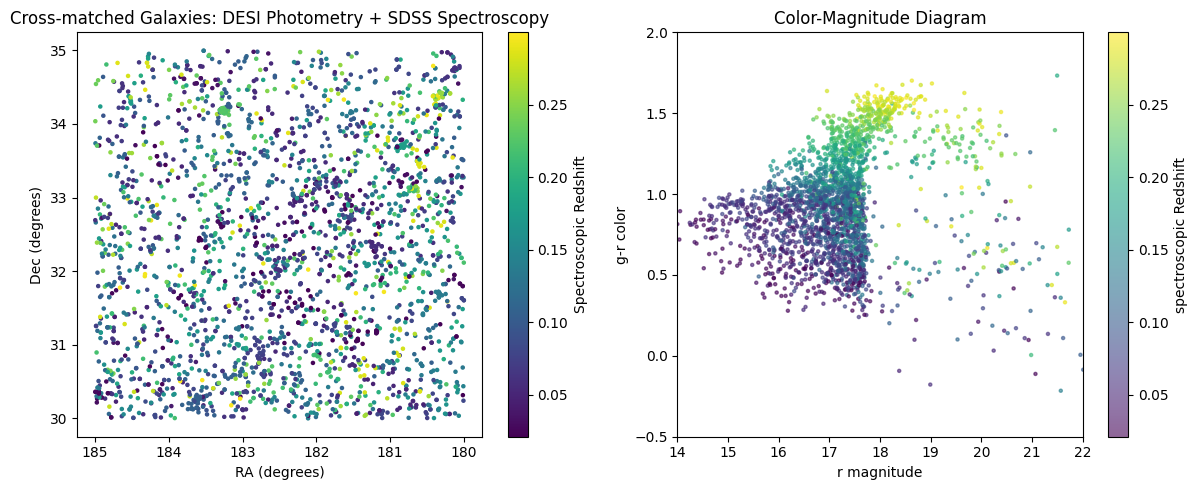

In [14]:
##############################################
#cross-matched data with photometry colors and spectroscopic redshifts
##############################################

plt.figure(figsize=(12, 5))

#the spatial distribution colored by redshift
plt.subplot(1, 2, 1)
plt.scatter(crossmatched_data['photo_ra'], crossmatched_data['photo_dec'],s=5, c=crossmatched_data['redshift'], cmap='viridis')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Cross-matched Galaxies: DESI Photometry + SDSS Spectroscopy')
plt.colorbar(label='Spectroscopic Redshift')
plt.gca().invert_xaxis()




# Right panel: Color-magnitude diagram
plt.subplot(1, 2, 2)
plt.scatter(crossmatched_data['mag_r'],
           crossmatched_data['g_r'],
           c=crossmatched_data['redshift'],
           s=5,
           alpha=0.6,
           cmap='viridis')
plt.xlabel('r magnitude')
plt.ylabel('g-r color')
plt.title('Color-Magnitude Diagram')
plt.colorbar(label='spectroscopic Redshift')
plt.xlim(14, 22)
plt.ylim(-0.5, 2.0)
plt.tight_layout()
plt.show()

In [15]:
#this is cool bc we get to see if the properties of the  galaxies change with distance

In [16]:
#next: 1) we need to select the redshift slices for large-scale structure
#2)3d view of the cosmic web
#3) analyze clustering in redshift slice
#4)add cosmic slime matter density

In [17]:

def zSlicePlot(zMin, zMax, raMin=ra_min, raMax = ra_max, decMin = dec_min, decMax = dec_max, data = crossmatched_data):
    '''A function to plot a z slice with given limits.
    INPUTS:
        zMin (float): the minimum z-value of the slice
        zMax (float): the maximum z-value of the slice
        raMin (float): the minimum ra of the area to display. Default is ra_min
        raMax (float): the maximum ra of the area to display. Default is ra_max
        decMin (float): the minimum dec of the area to display. Default is dec_min
        decMax (float): the maximum dec of the area to display. Default is dec_max
        data (array-like): the table of data to use. Default is the query result in crossmatched_data
    Produces a mathplot scatterplot of the desired region, with galaxies in the z-slice in black, and others in pale red.
    '''
    rz = (data['z'] >zMin) & (data['z']<zMax)
    plt.axis([raMin,raMax,decMin,decMax])
    plt.xlabel("RA (degrees)", fontsize=20)
    plt.ylabel("Dec (degrees)", fontsize=20)
    plt.scatter(data['ra'], data['dec'],s=3,color='r',marker='o',alpha=0.25)
    plt.scatter(data['ra'][rz], data['dec'][rz],s=10,color='b',marker='o')
    plt.show()

In [18]:
#Jenna's attempts to make astroquery work
from astroquery.sdss import SDSS

import warnings
warnings.filterwarnings('ignore',module='astropy.io.votables.tree')
warnings.filterwarnings('ignore',message='.*unclosed..socket')
query_photo = f'''
SELECT
    pz.z,
    pz.zErr,
    photo.dec,
    photo.ra,
    photo.objID
FROM  PhotoObj AS photo
JOIN Photoz AS pz ON photo.ObjID = pz.ObjID
WHERE
    photo.ra BETWEEN {ra_min} AND {ra_max}
    AND photo.dec BETWEEN {dec_min} AND {dec_max}
    AND pz.z BETWEEN {z_min} AND {z_max}
    AND photo.type = 3
    AND pz.zERR >= 0
    AND photo.clean = 1
    AND pz.PhotoErrorClass = 1
'''
photo_data = SDSS.query_sql(query_photo,timeout=600)


In [19]:
query_spec = f"""
SELECT
    s.ra,
    s.dec,
    s.z,
    s.zerr,
    s.class,
    s.specobjid,
    s.bestobjid
FROM specobj AS s
WHERE
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
spec_data = SDSS.query_sql(query_spec,timeout=600)


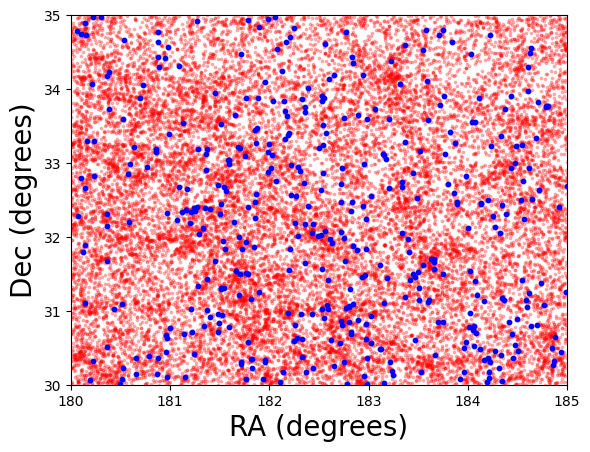

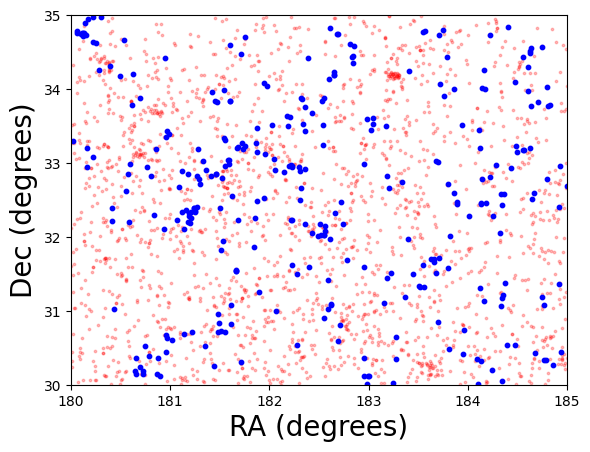

In [20]:
zSlicePlot(0.05,0.07, data=photo_data)
zSlicePlot(0.05,0.07, data=spec_data)

In [22]:
PhotoZ_std = np.std(photo_data['z'])
SpecZ_std = np.std(spec_data['z'])
print(f"Photometric redshift standard deviation: {PhotoZ_std:.3f}")
print(f"Spectroscopic redshift standard deviation: {SpecZ_std:.3f}")

PhotoZ_meanErr = np.mean(photo_data['zErr'])
SpecZ_meanErr = np.mean(spec_data['zerr'])
print(f"Photometric redshift mean zErr: {PhotoZ_meanErr:.3e}")
print(f"Spectroscopic redshift mean zErr: {SpecZ_meanErr:.3e}")
'''
fig1, axes = plt.subplots(1,2, figsize=(15,5))

#Plot 1: Spectroscopic
axes[0].hist(spec_data['z'])
axes[0].hist(photo_data['z'], alpha=.25)
axes[0].set_title("Spectroscopic")
axes[0].set_xlabel("Redshift")
axes[0].set_ylabel("number of targets")

#Plot 2: Photometric
axes[1].hist(photo_data['z'])
axes[1].set_title("Photometric")
axes[1].set_xlabel("Redshift")
axes[1].set_ylabel("number of targets")

plt.show()'''

Photometric redshift standard deviation: 0.064
Spectroscopic redshift standard deviation: 0.073
Photometric redshift mean zErr: 5.291e-02
Spectroscopic redshift mean zErr: 2.400e-05


'\nfig1, axes = plt.subplots(1,2, figsize=(15,5))\n\n#Plot 1: Spectroscopic\naxes[0].hist(spec_data[\'z\'])\naxes[0].hist(photo_data[\'z\'], alpha=.25)\naxes[0].set_title("Spectroscopic")\naxes[0].set_xlabel("Redshift")\naxes[0].set_ylabel("number of targets")\n\n#Plot 2: Photometric\naxes[1].hist(photo_data[\'z\'])\naxes[1].set_title("Photometric")\naxes[1].set_xlabel("Redshift")\naxes[1].set_ylabel("number of targets")\n\nplt.show()'

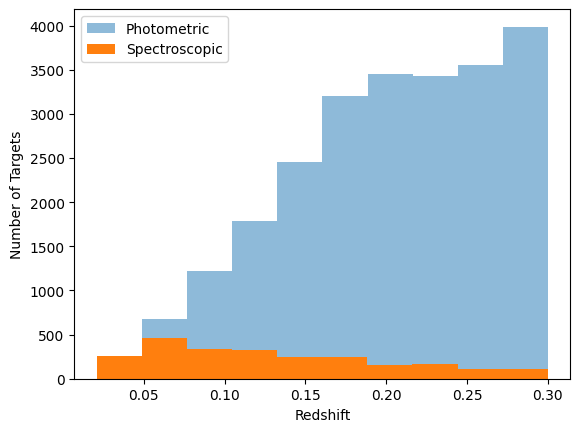

In [23]:
plt.hist(photo_data['z'], alpha=.50, label="Photometric")
plt.hist(spec_data['z'], label="Spectroscopic")
plt.xlabel("Redshift")
plt.ylabel("Number of Targets")
plt.legend(loc="upper left")
plt.show()

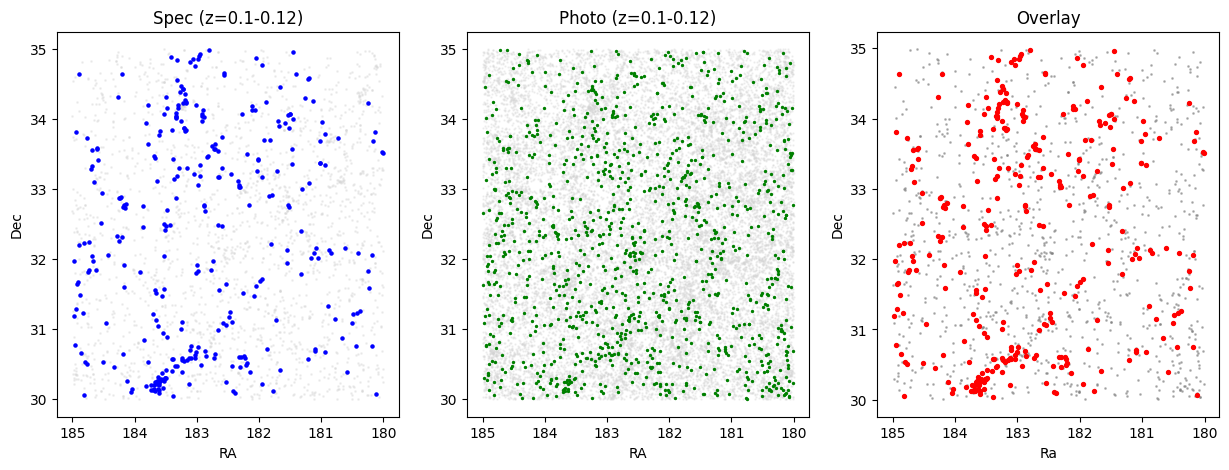

Redshift slice 0.1-0.12:
  Spec: 328 galaxies
  Photo: 1173 galaxies
  Ratio: 3.6x more photometric


In [24]:
def compareSpecPhoto(zMin, zMax):
    """Compare spectroscopic and photometric samples in same redshift slice"""

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))


    spec_slice = (spec_data['z'] > zMin) & (spec_data['z'] < zMax)
    photo_slice = (photo_data['z'] > zMin) & (photo_data['z'] < zMax)

    # Plot 1: Spectroscopic
    axes[0].scatter(spec_data['ra'], spec_data['dec'], s=1, color='lightgray', alpha=0.3)
    axes[0].scatter(spec_data['ra'][spec_slice], spec_data['dec'][spec_slice], s=5, color='blue')
    axes[0].set_title(f'Spec (z={zMin}-{zMax})')
    axes[0].set_xlabel('RA')
    axes[0].set_ylabel('Dec')
    axes[0].invert_xaxis()

    # Plot 2: Photometric
    axes[1].scatter(photo_data['ra'], photo_data['dec'], s=0.5, color='lightgray', alpha=0.3)
    axes[1].scatter(photo_data['ra'][photo_slice], photo_data['dec'][photo_slice], s=2, color='green')
    axes[1].set_title(f'Photo (z={zMin}-{zMax})')
    axes[1].set_xlabel('RA')
    axes[1].set_ylabel('Dec')
    axes[1].invert_xaxis()

    # Plot 3: Overlay
    axes[2].scatter(photo_data['ra'][photo_slice], photo_data['dec'][photo_slice], s=1, color='gray', alpha=0.5)
    axes[2].scatter(spec_data['ra'][spec_slice], spec_data['dec'][spec_slice], s=8, color='red')
    axes[2].set_title('Overlay')
    axes[2].set_xlabel('Ra')
    axes[2].set_ylabel('Dec')
    axes[2].invert_xaxis()

    plt.show()

    # Printingthe counts
    print(f"Redshift slice {zMin}-{zMax}:")
    print(f"  Spec: {spec_slice.sum()} galaxies")
    print(f"  Photo: {photo_slice.sum()} galaxies")
    print(f"  Ratio: {photo_slice.sum()/spec_slice.sum():.1f}x more photometric")


compareSpecPhoto(0.10, 0.12)

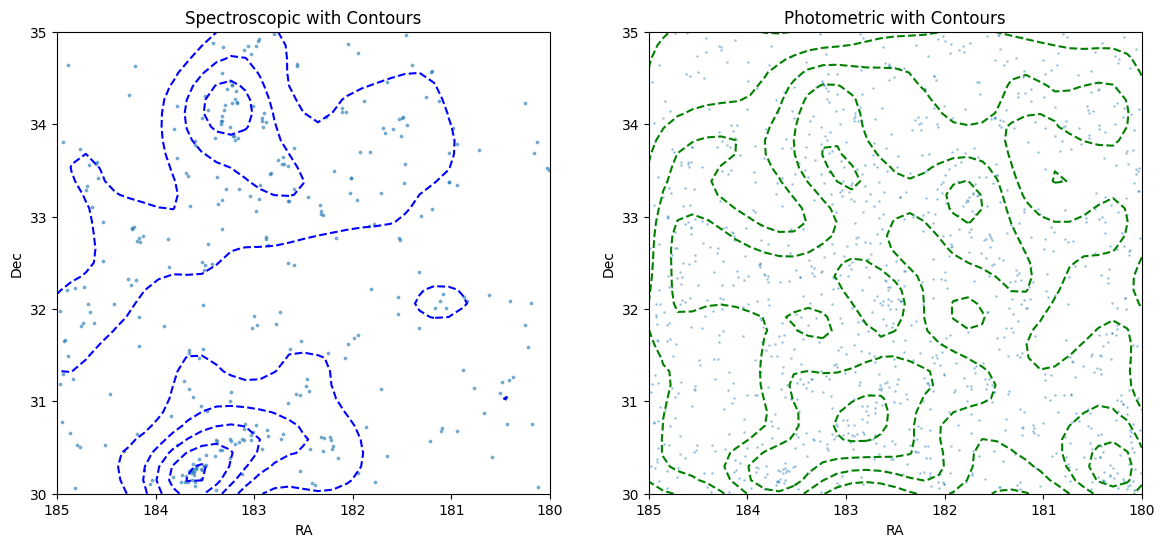

In [31]:
#from Cosmic Slime notebook
#density contours

from astropy.convolution import convolve, Gaussian2DKernel

def create_density_contours(zMin, zMax):

    # get slice
    spec_slice = spec_data[(spec_data['z'] > zMin) & (spec_data['z'] < zMax)]
    photo_slice = photo_data[(photo_data['z'] > zMin) & (photo_data['z'] < zMax)]

    # Initialize gaussian kernel (from notebook)
    gauss_kernel = Gaussian2DKernel(2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Spec contours (adapted from Coma cluster analysis)
    dens_spec, xedges, yedges = np.histogram2d(
        spec_slice['ra'], spec_slice['dec'],
        range=[[180, 185], [30, 35]], bins=35
    )
    dens_spec = convolve(dens_spec, gauss_kernel)

    #plotting
    ax1.scatter(spec_slice['ra'], spec_slice['dec'], s=3, alpha=0.5)
    cntr1 = ax1.contour(dens_spec.T, colors='blue', linestyles='dashed',
                        extent=(180, 185, 30, 35), levels=5)
    ax1.set_title('Spectroscopic with Contours')
    ax1.set_xlabel('RA')
    ax1.set_ylabel('Dec')
    ax1.invert_xaxis()

    # Photo contours
    dens_photo, _, _ = np.histogram2d(
        photo_slice['ra'], photo_slice['dec'],
        range=[[180, 185], [30, 35]], bins=35
    )
    dens_photo = convolve(dens_photo, gauss_kernel)

    # Plot photo
    ax2.scatter(photo_slice['ra'], photo_slice['dec'], s=1, alpha=0.3)
    cntr2 = ax2.contour(dens_photo.T, colors='green', linestyles='dashed',
                        extent=(180, 185, 30, 35), levels=5)
    ax2.set_title('Photometric with Contours')
    ax2.set_xlabel('RA')
    ax2.set_ylabel('Dec')
    ax2.invert_xaxis()

    plt.show()

create_density_contours(0.10, 0.12)

Densest region: 52 galaxies
Location: RA 183.0-184.0, Dec 30.0-31.0


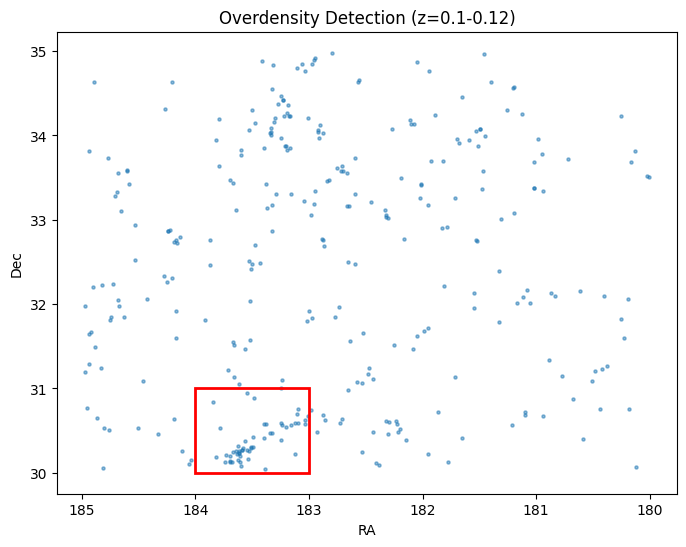

In [34]:
#overdensity from Cosmic Slime notebook

def find_structure_regions(zMin, zMax):

    spec_slice = spec_data[(spec_data['z'] > zMin) & (spec_data['z'] < zMax)]

    #split up into regions
    ra_bins = np.linspace(180, 185, 6)
    dec_bins = np.linspace(30, 35, 6)


    max_density = 0
    densest_cell = None

    # find densest region
    for i in range(len(ra_bins)-1):
        for j in range(len(dec_bins)-1):
            mask = ((spec_slice['ra'] > ra_bins[i]) &
                   (spec_slice['ra'] < ra_bins[i+1]) &
                   (spec_slice['dec'] > dec_bins[j]) &
                   (spec_slice['dec'] < dec_bins[j+1]))

            count = mask.sum()
            if count > max_density:
                max_density = count
                densest_cell = (ra_bins[i], ra_bins[i+1],
                               dec_bins[j], dec_bins[j+1])

    print(f"Densest region: {max_density} galaxies")
    print(f"Location: RA {densest_cell[0]:.1f}-{densest_cell[1]:.1f}, "
          f"Dec {densest_cell[2]:.1f}-{densest_cell[3]:.1f}")

    # Visuals
    plt.figure(figsize=(8, 6))
    plt.scatter(spec_slice['ra'], spec_slice['dec'], s=5, alpha=0.5)
    rect = plt.Rectangle((densest_cell[0], densest_cell[2]),
                         densest_cell[1]-densest_cell[0],
                         densest_cell[3]-densest_cell[2],
                         fill=False, color='red', linewidth=2)
    plt.gca().add_patch(rect)
    plt.xlabel('RA')
    plt.ylabel('Dec')
    plt.title(f'Overdensity Detection (z={zMin}-{zMax})')
    plt.gca().invert_xaxis()
    plt.show()

find_structure_regions(0.10, 0.12)